<a href="https://colab.research.google.com/github/RachelRamirez/CIFAR-10/blob/main/Migrating_to_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"**Simple convnet**" Architecture with Extremely Limited Data used to Train CNN

**Original Author with MNIST:** [fchollet](https://twitter.com/fchollet)<br>
Date created: 2015/06/19<br>

**Modified to Fashion MNIST** [rachelramirez](https://github.com/RachelRamirez/FashionMNIST_DataAugmentation) 2021/08/25


**Modified to Fashion MNIST** [rachelramirez](https://github.com/RachelRamirez/FashionMNIST_DataAugmentation) 2021/08/25


**Description:** A simple convnet architecture for training on Fashion MNIST, is frozen and then data augmentation techniques are attempted as a Design of Experiment (DOE).

Then data is limited to varying levels of sample sizes  [500, 1000]  to view the effect of data augmentation on increasing model accuracy.

More features are added to original notebook for residual/error analysis such as confusion matrix and data augmentation.

## Google Colab Pro Check Script 

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Tue Sep 21 14:53:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import files
from keras.layers import GaussianNoise
from sklearn.metrics import plot_confusion_matrix

print(tf. __version__) 


import pandas as pd
from datetime import datetime
from keras.utils.vis_utils import plot_model

2.6.0


# CNN Building

What is the right combination of number of convolutional layers, filters, and fully connected layers, batch normalization, learning rate,  filters, dropout, weight initialization?

 



## Import CIFAR Data

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
The CIFAR data set has  50000  training observations, and  10000  test observations.
I intend to explore different CNN model architectures with just 80% of the training observations, and use the other 20% as validation
I need to come back to this point and randomize
AxesSubplot(0.125,0.125;0.775x0.755)
New Training Set shape:  (30000, 1) , Val set shape of ,  (10000, 1)  and test set shape of  (10000, 1)
x_train shape: (30000, 32, 32, 3, 1)
30000 train samples
10000 validation samples
10000  test samples saved from the training set


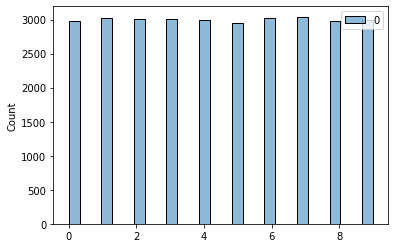

In [21]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# # Until the end of all analysis I don't really want to look at the real test set results
# # I'm overwriting them to make sure I don't accidentally use them

print("The CIFAR data set has ", x_train.shape[0] , " training observations, and ", x_test.shape[0], " test observations."  )
print("I intend to explore different CNN model architectures with just 80% of the training observations, and use the other 20% as validation")
print("I need to come back to this point and randomize")

x_test = []
y_test = []


# # I decide to take 30,000 samples of the training set, and use that to 
# #  and a VALIDATION Set of up to 10,000 samples, and a FAKE-TEST set of the remaining 10,000
# # After Analyzing the best "Augmentation Effect" I wil apply it to the "REAL" Test DataSet to see if it improved.

n = 30000

# # Validation Set  
x_val = x_train[n:n+10000]
y_val = y_train[n:n+10000]

# #My FAKE Test Set is 58000
x_test = x_train[n+10000:]
y_test = y_train[n+10000:]


# # Finally I change train dataset to first n
x_train = x_train[0:n]
y_train = y_train[0:n]

hist= sn.histplot(y_train)
print(hist)
# #My holdout Test Set after all the DOE is the original TEST set from dataset


print("New Training Set shape: ", y_train.shape, ", Val set shape of , ", y_val.shape, " and test set shape of ", y_test.shape)


# Scale images to the [0, 1] range # put into preprocessing model step
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255   
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_val = np.expand_dims(x_val, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], " test samples saved from the training set")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Try to put in tensor flow shape
x_val = tf.stack(x_val)
y_val = tf.stack(y_val)


# Define Manual Validation Set
valid_set = (x_val, y_val)


## Model Exploration

What is the right combination of number of convolutional layers, filters, and fully connected layers, batch normalization, learning rate,  filters, dropout, weight initialization?


In [ ]:
  model = keras.Sequential(
  [
      keras.Input(shape=input_shape),
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),
    #  data_augmentation,   
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      #layers.Dropout(0.5),
      layers.Dense(num_classes, activation="softmax")
  ])


# Augmentation Experiment

The first part of this experiment is looking at the space for *TrainingSize*, *ValidationSize*, *BatchSize*, and *EpochSize*.  These all likely effect one another (4-way interactions) so a DOE design is used to look at Response Surface Methods.

A: BatchSize (10, 100)

B: Epochs  (15, 50)

C: Training Size (Count)  (100, 1000)

D: Validation (as percentage of Training Size)  (20%, 50%) 

Replicates: 2
Center Points: 1

## Prepare the data

AxesSubplot(0.125,0.125;0.775x0.755)
x_train shape: (5000, 32, 32, 3, 1)
5000 train samples
1000 validation samples
44000  test samples saved from the training set


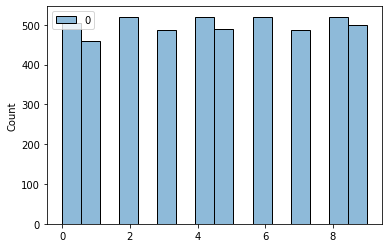

In [8]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Until the end of all analysis I don't really want to look at the real test set results
# I'm overwriting them to make sure I don't accidentally use them

x_test = []
y_test = []


# I decide to take a small dataset - 2000 samples of the 60000, and use that to 
# create a TRAIN Set of up to 1000 samples, a VALIDATION Set of up to 1000 samples, and a FAKE-TEST set of the remaining 58000
# After Analyzing the best "Augmentation Effect" I wil apply it to the "REAL" Test DataSet to see if it improved.


# # Validation Set is 1000 --> 500 
x_val = x_train[5000:6000]
y_val = y_train[5000:6000]

# #My FAKE Test Set is 58000
x_test = x_train[6000:60000]
y_test = y_train[6000:60000]


# # Finally I change train dataset to first 1500
x_train = x_train[0:5000]
y_train = y_train[0:5000]

hist= sn.histplot(y_train)
print(hist)
#My holdout Test Set after all the DOE is the original TEST set from dataset


#print("Fashion MNIST has training size up to: ", y_train.shape, ", val set of , ", y_val.shape, " and test set of ", y_test.shape)


# Scale images to the [0, 1] range # put into preprocessing model step
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255   
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_val = np.expand_dims(x_val, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_val.shape[0], "validation samples")
print(x_test.shape[0], " test samples saved from the training set")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Try to put in tensor flow shape
x_val = tf.stack(x_val)
y_val = tf.stack(y_val)


# Define Manual Validation Set
valid_set = (x_val, y_val)


Class 2 looks a bit underrepresented, class 7 looks overrepresented in first 1000.  I looked at 1500 and it seemed more balanced

## Image Augmentation Factors 

Augmentation_Building Function to build Data Augmentation Layer in Keras

In [9]:
def augmentation_building(flip, c, r, n, z, randseed=42, num_classes = 10, input_shape = input_shape):  

  if flip == 0:
    flip_layer      = layers.experimental.preprocessing.Rescaling(1./1, input_shape=(input_shape))
  else:
    flip_layer     = layers.experimental.preprocessing.RandomFlip("horizontal", seed = randseed, name = "FlipHorizontal")

  # if r == 0:
  #   rotate_layer    = layers.experimental.preprocessing.Rescaling(1./1, input_shape=(input_shape), name = "RotateOff")
  # else:
  #   rotate_layer   = layers.experimental.preprocessing.RandomRotation(factor = r, seed = randseed, name = "RotateOn")

  if c == 0:
    contrast_layer  = layers.experimental.preprocessing.Rescaling(1./1, input_shape=(input_shape), name = "ContrastOff")
  else:
    contrast_layer = layers.experimental.preprocessing.RandomContrast(factor=c, seed = randseed, name = "ContrastOn") 

  if n == 0:
    noise_layer     = layers.experimental.preprocessing.Rescaling(1./1, input_shape=(input_shape), name = "NoiseOff")
  else:
   noise_layer    = layers.GaussianNoise(n, name = "GaussianNoise")

  if z == 0:
    zoom_layer      = layers.experimental.preprocessing.Rescaling(1./1, input_shape=(input_shape), name = "ZoomOff")
  else:
    zoom_layer     = layers.experimental.preprocessing.RandomZoom(height_factor=z, fill_mode="constant", fill_value=0.0, name="ZoomOn")

  
  data_augmentation = tf.keras.Sequential([
    flip_layer,  
    #rotate_layer,  
    contrast_layer, 
    noise_layer,
    zoom_layer  
  ])
 

  model = keras.Sequential(
  [
      keras.Input(shape=input_shape),
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),
      data_augmentation,   
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      #layers.Dropout(0.5),
      layers.Dense(num_classes, activation="softmax")
  ])
  
  return model


Code to print the training-validation run plots by Accuracy and Loss 


In [5]:
def print_history(history):
  print(history.history.keys())
  plt.figure(counter+1)

  # plt.subplot(211)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'])
  plt.show()

  # summarize history for loss  
  plt.subplot(212)  
  plt.plot(history.history['loss'])  
  plt.plot(history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'validation'], loc='upper left')  
  plt.show() 

# Run the Experiment

In [10]:
var_trainsize  = 20, 100 #, 500, 1000 #, 1500, 2500, 5000 
#var_flip = 0, 1                     # 0 means no flip, 1 means horizontal flip
var_contrast = 0, 0.05, 0.1, 0.15 # 0.001, 0.01, 0.1    # 0 means no contrast (I think) and 1.02 means contrast difference of 0.02  (I think)
# var_rotate = 0, 0.1     #0.025, .05       # 0.5 means rotate between -5 and 5 degrees
var_noise = 0, 0.05, .1  ,0.15       # 0 means no noise, 0.1 means 10% noise
var_zoom = 0, 0.05        #0.05, .1
randseed = 42 #, 123, 4321


def recordmodel(model, t, currentscore, current_run_variables, score_dictionary):
  if currentscore > score_dictionary[t]['score']:
    modelfilename = str("model_best")  + str(t) + str(".h5")
    model.save_weights(modelfilename) 
    print("                                        \t   * new record accuracy saved")
    score_dictionary[t]['score'] = currentscore
    score_dictionary[t]['record'] = current_run_variables
  

def initialize_variables(t):
  variable_name, variable_value, variable_record = str("best_") + str(t) + str("_run_score"), 0.1, ""
  return variable_name, variable_value, variable_record

# Initialize Score Keeper
score_dictionary = {}
for t in var_trainsize:
    score_dictionary[t] = { 'score': 0.1, 'record': "" }

# Initialize Baseline Score Keepers
basescore = {}
for t in var_trainsize:
    basescore[t] = 0
        


(20, 10)
1 128 100 20 0 0 0 0 0 	 Accuracy:  0.1563  Loss:  5.0501
Baseline Model Saved
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


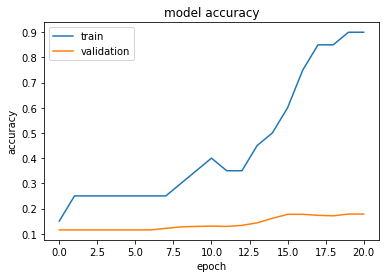

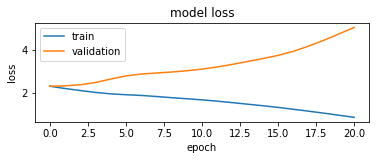

2 128 100 20 0 0 0 0 0.05 	 Accuracy:  0.1687  Loss:  3.7708
                                        	   * new record accuracy saved
3 128 100 20 0 0 0 0.05 0 	 Accuracy:  0.1600  Loss:  4.7621
4 128 100 20 0 0 0 0.05 0.05 	 Accuracy:  0.1510  Loss:  4.9535
5 128 100 20 0 0 0 0.1 0 	 Accuracy:  0.1638  Loss:  4.4747
6 128 100 20 0 0 0 0.1 0.05 	 Accuracy:  0.1576  Loss:  4.6870
7 128 100 20 0 0 0 0.15 0 	 Accuracy:  0.1494  Loss:  4.0597
8 128 100 20 0 0 0 0.15 0.05 	 Accuracy:  0.1372  Loss:  3.8366
9 128 100 20 0 0.05 0 0 0 	 Accuracy:  0.1633  Loss:  5.1630
10 128 100 20 0 0.05 0 0 0.05 	 Accuracy:  0.1566  Loss:  4.2547
11 128 100 20 0 0.05 0 0.05 0 	 Accuracy:  0.1651  Loss:  4.4341
12 128 100 20 0 0.05 0 0.05 0.05 	 Accuracy:  0.1564  Loss:  4.7449
13 128 100 20 0 0.05 0 0.1 0 	 Accuracy:  0.1641  Loss:  4.2794
14 128 100 20 0 0.05 0 0.1 0.05 	 Accuracy:  0.1497  Loss:  4.2228
15 128 100 20 0 0.05 0 0.15 0 	 Accuracy:  0.1545  Loss:  3.9887
16 128 100 20 0 0.05 0 0.15 0.05 	 Accu

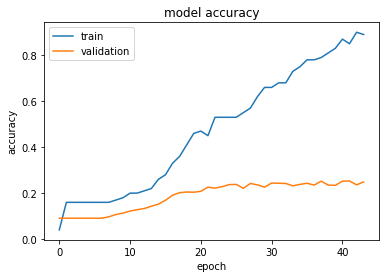

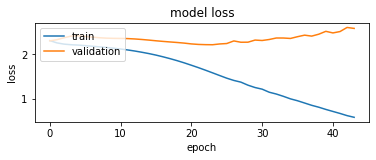

34 128 100 100 0 0 0 0 0.05 	 Accuracy:  0.2305  Loss:  2.5497
                                        	   * new record accuracy saved
35 128 100 100 0 0 0 0.05 0 	 Accuracy:  0.2256  Loss:  2.6107
36 128 100 100 0 0 0 0.05 0.05 	 Accuracy:  0.2232  Loss:  2.4393
37 128 100 100 0 0 0 0.1 0 	 Accuracy:  0.2211  Loss:  2.5528
38 128 100 100 0 0 0 0.1 0.05 	 Accuracy:  0.2201  Loss:  2.6373
39 128 100 100 0 0 0 0.15 0 	 Accuracy:  0.2176  Loss:  2.5764
40 128 100 100 0 0 0 0.15 0.05 	 Accuracy:  0.2222  Loss:  2.5748
41 128 100 100 0 0.05 0 0 0 	 Accuracy:  0.2344  Loss:  2.5289
                                        	   * new record accuracy saved
42 128 100 100 0 0.05 0 0 0.05 	 Accuracy:  0.2419  Loss:  2.5161
                                        	   * new record accuracy saved
43 128 100 100 0 0.05 0 0.05 0 	 Accuracy:  0.2323  Loss:  2.4985
44 128 100 100 0 0.05 0 0.05 0.05 	 Accuracy:  0.2157  Loss:  2.5507
45 128 100 100 0 0.05 0 0.1 0 	 Accuracy:  0.2160  Loss:  2.5835
46 128 

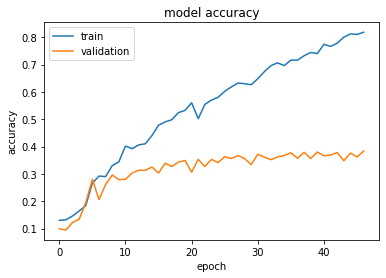

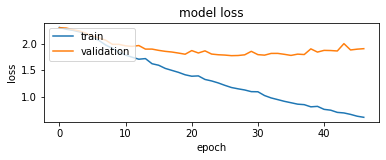

66 128 100 500 0 0 0 0 0.05 	 Accuracy:  0.3770  Loss:  2.0515
                                        	   * new record accuracy saved
67 128 100 500 0 0 0 0.05 0 	 Accuracy:  0.3803  Loss:  1.8759
                                        	   * new record accuracy saved
68 128 100 500 0 0 0 0.05 0.05 	 Accuracy:  0.3737  Loss:  1.9956
69 128 100 500 0 0 0 0.1 0 	 Accuracy:  0.3691  Loss:  1.9011
70 128 100 500 0 0 0 0.1 0.05 	 Accuracy:  0.3551  Loss:  2.1525
71 128 100 500 0 0 0 0.15 0 	 Accuracy:  0.3442  Loss:  2.3457
72 128 100 500 0 0 0 0.15 0.05 	 Accuracy:  0.3660  Loss:  1.9457
73 128 100 500 0 0.05 0 0 0 	 Accuracy:  0.3774  Loss:  1.9144
74 128 100 500 0 0.05 0 0 0.05 	 Accuracy:  0.3775  Loss:  1.9886
75 128 100 500 0 0.05 0 0.05 0 	 Accuracy:  0.3720  Loss:  2.0590
76 128 100 500 0 0.05 0 0.05 0.05 	 Accuracy:  0.3846  Loss:  1.9054
                                        	   * new record accuracy saved
77 128 100 500 0 0.05 0 0.1 0 	 Accuracy:  0.3643  Loss:  2.1267
78 128 

KeyboardInterrupt: ignored

In [11]:
scorelist = [] 

counter = 0
#for b in var_batches:
#  for e in var_epochs:
b = 128                    # how would this work for training sets less than this amount?
e = 100
r = 0 # no more rotate
flip = 0 # no more flip

#for randseed in randseeds:  # like the replicates in a test
for t in var_trainsize:

  new_x_train = x_train[0:t]  
  new_y_train = y_train[0:t]
  print(new_y_train.shape)

#  for flip in var_flip:
  for c in var_contrast:
    # for r in var_rotate:
      for n in var_noise:
        for z in var_zoom:
        
          counter+=1
          model = augmentation_building(flip, c, r, n, z, randseed=randseed)
                
          

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
          model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
          model.save_weights('model_clear.h5') 
          model.load_weights('model_clear.h5')
          
          
          start_time = datetime.now()
          history = model.fit(new_x_train, new_y_train, batch_size=b, epochs=e, validation_data=valid_set, verbose=0, callbacks=callback)
          #end_time = datetime.now()
          #dur = end_time - start_time

          score = model.evaluate(x_test, y_test, verbose=0)

          scorelist +=  [[counter, e, b,  t,  flip ,c,r,n,z,  score[1], score[0]]]
          print(counter, b, e,  t, flip,c,r,n, z, "\t Accuracy: ", format(score[1], ".4f"), " Loss: ", format(score[0], ".4f"))
          
          current_run_variables = "Flip " + str(flip) +  ", Contrast " + str(c) +  ", Rotate " + str(r) +  ", Noise " + str(n) +  ", Zoom: " + str(z) + "RandSeed" + str(randseed)
        
        
          if flip ==0 and c ==0 and n==0 and z == 0:
            print("Baseline Model Saved")
            modelbaseline = "Baseline" + str(t)  +  ".h5"
            model.save_weights(modelbaseline)
            basescore[t] = score[1]
            print_history(history)
            
          else:  
          #Keep tabs on the best performing 100-run models
            modelname =  "model_" + "best"   + str(t) + ".h5"
            recordmodel(model, t, score[1],  current_run_variables, score_dictionary)
                        
          filename = str(t) + 'T-' + str(flip) + 'F-' + str(c) + "C-" +  str(r) + "R-" +  str(n) + "N-" + str(z) + "Z" + str('.csv')



np.savetxt(filename, scorelist, delimiter=',')
print("File ", filename, " saved at ", start_time)




### Model Summary - model in for-loop (hide)

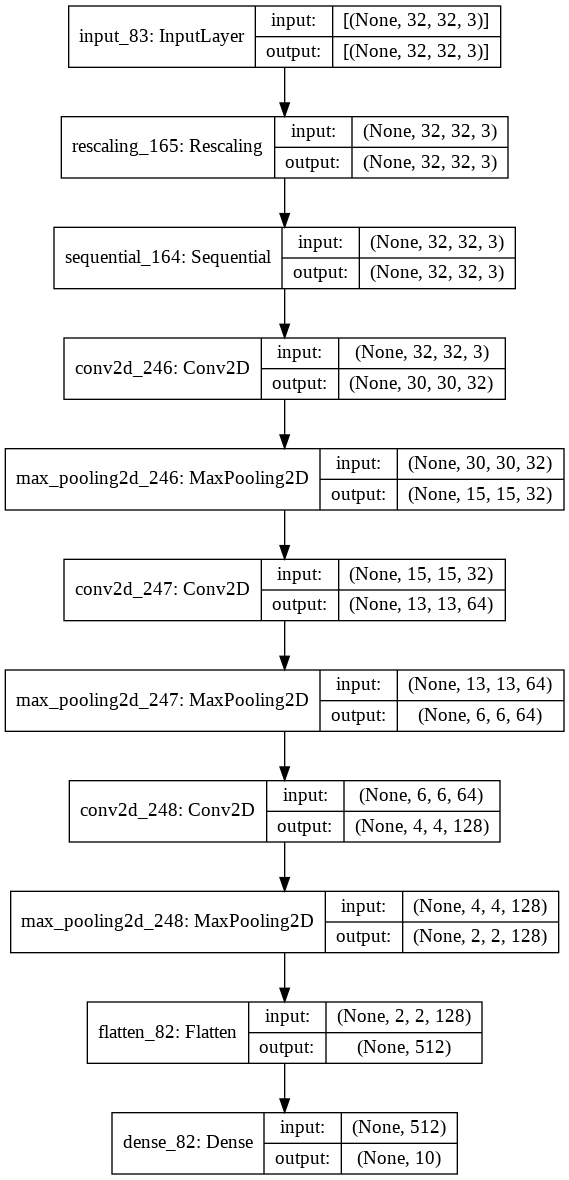

In [12]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Better Plot Model Option

In [ ]:
!pip install h5py==2.10.0

# Evaluate the trained model on TEST DATA

In [ ]:
LABEL_NAMES = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoots']

modelnames = []
for t in var_trainsize:  
  modelfilename = str("model_best")  + str(t) + str(".h5")
  modelnames = modelnames + [modelfilename]


basenames = []
for t in var_trainsize:  
  modelfilename = str("Baseline")  + str(t) + str(".h5")
  basenames = basenames + [modelfilename]
 
y_test_reshape = np.argmax(y_test, axis=1) 
# Quick Check which model was better (Augmented or Base/Non-Augmented)
for t in var_trainsize:
  if basescore[t] >= score_dictionary[t]['score']:
    print("Base ", t, "has best Accuracy", basescore[t])
  else:
    print("Augmented ", t, "has best Accuracy,", score_dictionary[t]['score'], " compared to ", basescore[t], "difference of \t", (score_dictionary[t]['score']-basescore[t]))


# When Evaluating the Models on the Test/Holdout Data I want to make sure I'm not
#  inadvertently adding a dataaugmentation step, I just want the testdata/holdoutdata to go through the weights.so i respecify the model architecture here
  model = keras.Sequential(
  [
      keras.Input(shape=input_shape),
      layers.experimental.preprocessing.Rescaling(1./255, input_shape=(input_shape)),
    #  data_augmentation,   
      layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Flatten(),
      #layers.Dropout(0.5),
      layers.Dense(num_classes, activation="softmax")
  ])


def makeconfusionmatrix(model, modelname, accuracy, tsize, otherinfo = ""):
    model.load_weights(modelname)

    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    
    confusion_matrix = tf.math.confusion_matrix(y_test_reshape, predictions)  #First Variable is on VERTICAL, second Variable is on X HORIZONTAL
    title = str(modelname) + str(" Accuracy " ) + str(round(accuracy, ndigits=4)) + str(otherinfo)

    f, ax = plt.subplots(figsize=(5, 7), sharey = True)
    sn.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.5,
        fmt="d",
        square=True
        ,cmap=plt.cm.gray_r
        ,cbar=False
        ,xticklabels=LABEL_NAMES
        ,yticklabels=LABEL_NAMES
        #,display_labels=LABEL_NAMES
        ,ax=ax

    )
    plt.title(title)
    ax.set_ylabel('True Category')
    ax.set_xlabel('Predictions')
    plt.show()
  


In my first run, no data augmentation, 100 random samples of the Training Set, using 50% of that as the Validation Set, using a Batch Size of 50 and Epochs = 30, the resulting accuracy of the test-set is Test loss: 0.912209689617157
Test accuracy: 0.6866999864578247

## Confusion Matrix without the Diagonal

In [ ]:
def makeconfusionmatrixminusidentity(model, modelname, accuracy, tsize, otherinfo = ""):
    model.load_weights(modelname)

    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    
    confusion_matrix = tf.math.confusion_matrix(y_test_reshape, predictions)  #First Variable is on VERTICAL, second Variable is on X HORIZONTAL
    title = str(modelname) + str(" Accuracy " ) + str(round(accuracy, ndigits=4)) + str(otherinfo)


    confusing_part_matrix= np.array(confusion_matrix)-np.identity(confusion_matrix.shape[0])*np.diag(confusion_matrix)
    confusing_part_matrix = tf.convert_to_tensor(confusing_part_matrix)
    title = str(modelname)

    f, ax = plt.subplots(figsize=(9, 7))
    sn.heatmap(
        confusing_part_matrix,
        annot=True,
        linewidths=.5
        ,fmt='.0f'
        ,square=True
        ,cmap=plt.cm.gray_r
        ,cbar=True
        ,vmax=2000
        ,xticklabels=LABEL_NAMES
        ,yticklabels=LABEL_NAMES
        #,display_labels=LABEL_NAMES
        #,ax=ax
    )

  
    plt.title(title)
    plt.show()


    ## find the max value of those remaining numbers
    thisnumber=np.max(confusing_part_matrix)

    # x_thisnumber=np.argmax(confusing_part_matrix,axis=0)
    # y_thisnumber=np.argmax(confusing_part_matrix,axis=1)
    # z_thisnumber=np.argmax(confusing_part_matrix)
    # display(x_thisnumber,y_thisnumber)
    # print("The worst the algorithm did is between " confus)
    z_thisnumber=np.argmax(confusing_part_matrix)
    z_thisnumber
    print("The algorithm misrecognizes ", thisnumber, "  of class " ,  LABEL_NAMES[np.math.floor(z_thisnumber/10)] , " as class ",  LABEL_NAMES[z_thisnumber%10])


    display(sum(sum(confusing_part_matrix)))


for modelname, tsize, basename  in zip(modelnames, var_trainsize, basenames):
  #makeconfusionmatrix(model, modelname, score_dictionary[tsize]['score'], tsize, otherinfo=str(score_dictionary[tsize]['record']))
  #makeconfusionmatrix(model, basename, basescore[tsize], tsize)
  makeconfusionmatrixminusidentity(model, modelname, score_dictionary[tsize]['score'], tsize, otherinfo=str(score_dictionary[tsize]['record']))
  makeconfusionmatrixminusidentity(model, basename, basescore[tsize], tsize)    

In [ ]:
plt.imshow(x_test[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()

Evaluate the "Winning Augmentations" for Holdout Data